# [*k진수에서 소수 개수 구하기*](https://programmers.co.kr/learn/courses/30/lessons/92335)
<div class="markdown solarized-dark"><h5>문제 설명</h5>

<p>양의 정수 <code>n</code>이 주어집니다. 이 숫자를 <code>k</code>진수로 바꿨을 때, 변환된 수 안에 아래 조건에 맞는 소수(Prime number)가 몇 개인지 알아보려 합니다.</p>

<ul>
<li><code>0P0</code>처럼 소수 양쪽에 0이 있는 경우</li>
<li><code>P0</code>처럼 소수 오른쪽에만 0이 있고 왼쪽에는 아무것도 없는 경우</li>
<li><code>0P</code>처럼 소수 왼쪽에만 0이 있고 오른쪽에는 아무것도 없는 경우</li>
<li><code>P</code>처럼 소수 양쪽에 아무것도 없는 경우</li>
<li>단, <code>P</code>는 각 자릿수에 0을 포함하지 않는 소수입니다.

<ul>
<li>예를 들어, 101은 <code>P</code>가 될 수 없습니다.</li>
</ul></li>
</ul>

<p>예를 들어, 437674을 3진수로 바꾸면 <code>211</code>0<code>2</code>01010<code>11</code>입니다. 여기서 찾을 수 있는 조건에 맞는 소수는 왼쪽부터 순서대로 211, 2, 11이 있으며, 총 3개입니다. (211, 2, 11을 <code>k</code>진법으로 보았을 때가 아닌, 10진법으로 보았을 때 소수여야 한다는 점에 주의합니다.) 211은 <code>P0</code> 형태에서 찾을 수 있으며, 2는 <code>0P0</code>에서, 11은 <code>0P</code>에서 찾을 수 있습니다.</p>

<p>정수 <code>n</code>과 <code>k</code>가 매개변수로 주어집니다. <code>n</code>을 <code>k</code>진수로 바꿨을 때, 변환된 수 안에서 찾을 수 있는 <strong>위 조건에 맞는 소수</strong>의 개수를 return 하도록 solution 함수를 완성해 주세요.</p>

<hr>

<h5>제한사항</h5>

<ul>
<li>1 ≤ <code>n</code> ≤ 1,000,000</li>
<li>3 ≤ <code>k</code> ≤ 10</li>
</ul>

<hr>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>n</th>
<th>k</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td>437674</td>
<td>3</td>
<td>3</td>
</tr>
<tr>
<td>110011</td>
<td>10</td>
<td>2</td>
</tr>
</tbody>
      </table>
<hr>

<h5>입출력 예 설명</h5>

<p><strong>입출력 예 #1</strong></p>

<p>문제 예시와 같습니다. </p>

<p><strong>입출력 예 #2</strong></p>

<p>110011을 10진수로 바꾸면 110011입니다. 여기서 찾을 수 있는 조건에 맞는 소수는 11, 11 2개입니다. 이와 같이, 중복되는 소수를 발견하더라도 모두 따로 세어야 합니다.</p>

<hr>

<h5>제한시간 안내</h5>

<ul>
<li>정확성 테스트 : 10초</li>
</ul>
</div>

---

In [1]:
import math

def n_dim(n, k):
    rev_base = ''

    while n > 0:
        n, mod = divmod(n, k)
        rev_base += str(mod)

    return rev_base[::-1] 


def is_prime_number(x):
    if x == 1:
        return False
    for i in range(2, int(math.sqrt(x)) + 1):
        if x % i == 0:
            return False 
    return True

    
def solution(n, k):
    new_n = n_dim(n,k)
    nn = new_n.split('0')
    answer = 0
    for i in nn:
        temp = int(i) if i !='' else 1
        if is_prime_number(temp):
            answer+=1
    return answer

In [2]:
case1 = [437674, 3, 3]
case2 = [110011, 10, 2]
for n, k, ans in [case1, case2]:
    print(f'n: {n}\t k: {k}\t ans: {ans}')
    print(f'Ans: {solution(n, k)==ans}\n')
    

n: 437674	 k: 3	 ans: 3
Ans: True

n: 110011	 k: 10	 ans: 2
Ans: True



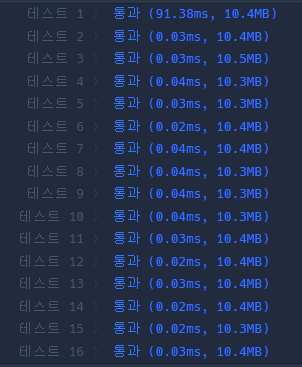

<img src='' width='50%'>

# [*사라지는 발판*](https://programmers.co.kr/learn/courses/30/lessons/92345)
<div class="markdown solarized-dark"><h5>문제 설명</h5>

<p>플레이어 A와 플레이어 B가 서로 게임을 합니다. 당신은 이 게임이 끝날 때까지 양 플레이어가 캐릭터를 몇 번 움직이게 될지 예측하려고 합니다.</p>

<p>각 플레이어는 자신의 캐릭터 하나를 보드 위에 올려놓고 게임을 시작합니다. 게임 보드는 1x1 크기 정사각 격자로 이루어져 있으며, 보드 안에는 발판이 있는 부분과 없는 부분이 있습니다. 발판이 있는 곳에만 캐릭터가 서있을 수 있으며, 처음 캐릭터를 올려놓는 곳은 항상 발판이 있는 곳입니다. 캐릭터는 발판이 있는 곳으로만 이동할 수 있으며, 보드 밖으로 이동할 수 없습니다. 밟고 있던 발판은 그 위에 있던 캐릭터가 다른 곳으로 이동하여 다른 발판을 밞음과 동시에 사라집니다. 양 플레이어는 번갈아가며 자기 차례에 자신의 캐릭터를 상하좌우로 인접한 4개의 칸 중에서 발판이 있는 칸으로 옮겨야 합니다.</p>

<p>다음과 같은 2가지 상황에서 패자와 승자가 정해지며, 게임이 종료됩니다.</p>

<ul>
<li>움직일 차례인데 캐릭터의 상하좌우 주변 4칸이 모두 발판이 없거나 보드 밖이라서 이동할 수 없는 경우, 해당 차례 플레이어는 패배합니다.</li>
<li>두 캐릭터가 같은 발판 위에 있을 때, 상대 플레이어의 캐릭터가 다른 발판으로 이동하여 자신의 캐릭터가 서있던 발판이 사라지게 되면 패배합니다.</li>
</ul>

<p>게임은 항상 플레이어 A가 먼저 시작합니다. 양 플레이어는 최적의 플레이를 합니다. 즉, 이길 수 있는 플레이어는 최대한 빨리 승리하도록 플레이하고, 질 수밖에 없는 플레이어는 최대한 오래 버티도록 플레이합니다. '이길 수 있는 플레이어'는 실수만 하지 않는다면 항상 이기는 플레이어를 의미하며, '질 수밖에 없는 플레이어'는 최선을 다해도 상대가 실수하지 않으면 항상 질 수밖에 없는 플레이어를 의미합니다. 최대한 오래 버틴다는 것은 양 플레이어가 캐릭터를 움직이는 횟수를 최대화한다는 것을 의미합니다.</p>

<p>아래 그림은 초기 보드의 상태와 각 플레이어의 위치를 나타내는 예시입니다.</p>

<p><img src="https://grepp-programmers.s3.ap-northeast-2.amazonaws.com/files/production/f6c72518-3c10-467e-a2c4-ecbe418c1dd4/02_2022_%E1%84%80%E1%85%A9%E1%86%BC%E1%84%8E%E1%85%A2%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6_%E1%84%89%E1%85%A1%E1%84%85%E1%85%A1%E1%84%8C%E1%85%B5%E1%84%82%E1%85%B3%E1%86%AB%E1%84%87%E1%85%A1%E1%86%AF%E1%84%91%E1%85%A1%E1%86%AB_01.png" title="" alt="02_2022_공채문제_사라지는발판_01.png"></p>

<p>위와 같은 경우, 플레이어 A는 실수만 하지 않는다면 항상 이길 수 있습니다. 따라서 플레이어 A는 이길 수 있는 플레이어이며, B는 질 수밖에 없는 플레이어입니다. 다음은 A와 B가 최적의 플레이를 하는 과정을 나타냅니다.</p>

<ol>
<li>플레이어 A가 초기 위치 (1, 0)에서 (1, 1)로 이동합니다. <strong>플레이어 A가 (0, 0)이나 (2, 0)으로 이동할 경우 승리를 보장할 수 없습니다. 따라서 무조건 이길 방법이 있는 (1, 1)로 이동합니다.</strong></li>
<li>플레이어 B는 (1, 1)로 이동할 경우, 바로 다음 차례에 A가 위 또는 아래 방향으로 이동하면 발판이 없어져 패배하게 됩니다. <strong>질 수밖에 없는 플레이어는 최대한 오래 버티도록 플레이하기 때문에 (1, 1)로 이동하지 않습니다.</strong> (1, 2)에서 위쪽 칸인 (0, 2)로 이동합니다.</li>
<li>A가 (1, 1)에서 (0, 1)로 이동합니다.</li>
<li>B에게는 남은 선택지가 (0, 1)밖에 없습니다. 따라서 (0, 2)에서 (0, 1)로 이동합니다.</li>
<li>A가 (0, 1)에서 (0, 0)으로 이동합니다. 이동을 완료함과 동시에 B가 서있던 (0, 1)의 발판이 사라집니다. B가 패배합니다.</li>
<li>만약 과정 2에서 B가 아래쪽 칸인 (2, 2)로 이동하더라도 A는 (2, 1)로 이동하면 됩니다. 이후 B가 (2, 1)로 이동, 다음 차례에 A가 (2, 0)으로 이동하면 B가 패배합니다.</li>
</ol>

<p>위 예시에서 양 플레이어가 최적의 플레이를 했을 경우, 캐릭터의 이동 횟수 합은 5입니다. 최적의 플레이를 하는 방법은 여러 가지일 수 있으나, 이동한 횟수는 모두 5로 같습니다.</p>

<p>게임 보드의 초기 상태를 나타내는 2차원 정수 배열 <code>board</code>와 플레이어 A의 캐릭터 초기 위치를 나타내는 정수 배열 <code>aloc</code>, 플레이어 B의 캐릭터 초기 위치를 나타내는 정수 배열 <code>bloc</code>이 매개변수로 주어집니다. 양 플레이어가 최적의 플레이를 했을 때, 두 캐릭터가 움직인 횟수의 합을 return 하도록 solution 함수를 완성해주세요.</p>

<hr>

<h5>제한사항</h5>

<ul>
<li>1 ≤ <code>board</code>의 세로 길이 ≤ 5</li>
<li>1 ≤ <code>board</code>의 가로 길이 ≤ 5</li>
<li><code>board</code>의 원소는 0 또는 1입니다.

<ul>
<li>0은 발판이 없음을, 1은 발판이 있음을 나타냅니다.</li>
<li>게임 보드의 좌측 상단 좌표는 (0, 0), 우측 하단 좌표는 (<code>board</code>의 세로 길이 - 1, <code>board</code>의 가로 길이 - 1)입니다.</li>
</ul></li>
<li><code>aloc</code>과 <code>bloc</code>은 각각 플레이어 A의 캐릭터와 플레이어 B의 캐릭터 초기 위치를 나타내는 좌표값이며 [r, c] 형태입니다.

<ul>
<li>r은 몇 번째 행인지를 나타냅니다.</li>
<li>0 ≤ r &lt; <code>board</code>의 세로 길이</li>
<li>c는 몇 번째 열인지를 나타냅니다.</li>
<li>0 ≤ c &lt; <code>board</code>의 가로 길이</li>
<li>초기 보드의 <code>aloc</code>과 <code>bloc</code> 위치는 항상 발판이 있는 곳입니다.</li>
<li><code>aloc</code>과 <code>bloc</code>이 같을 수 있습니다.</li>
</ul></li>
<li>상대 플레이어의 캐릭터가 있는 칸으로 이동할 수 있습니다.</li>
</ul>

<hr>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>board</th>
<th>aloc</th>
<th>bloc</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td>[[1, 1, 1], [1, 1, 1], [1, 1, 1]]</td>
<td>[1, 0]</td>
<td>[1, 2]</td>
<td>5</td>
</tr>
<tr>
<td>[[1, 1, 1], [1, 0, 1], [1, 1, 1]]</td>
<td>[1, 0]</td>
<td>[1, 2]</td>
<td>4</td>
</tr>
<tr>
<td>[[1, 1, 1, 1, 1]]</td>
<td>[0, 0]</td>
<td>[0, 4]</td>
<td>4</td>
</tr>
<tr>
<td>[[1]]</td>
<td>[0, 0]</td>
<td>[0, 0]</td>
<td>0</td>
</tr>
</tbody>
      </table>
<hr>

<h5>입출력 예 설명</h5>

<p><strong>입출력 예 #1</strong></p>

<p>문제 예시와 같습니다.</p>

<p><strong>입출력 예 #2</strong></p>

<p>주어진 조건을 그림으로 나타내면 아래와 같습니다.</p>

<p><img src="https://grepp-programmers.s3.ap-northeast-2.amazonaws.com/files/production/0319028e-d27c-42d1-b048-027c1ba6a2c7/02_2022_%E1%84%80%E1%85%A9%E1%86%BC%E1%84%8E%E1%85%A2%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6_%E1%84%89%E1%85%A1%E1%84%85%E1%85%A1%E1%84%8C%E1%85%B5%E1%84%82%E1%85%B3%E1%86%AB%E1%84%87%E1%85%A1%E1%86%AF%E1%84%91%E1%85%A1%E1%86%AB_02.png" title="" alt="02_2022_공채문제_사라지는발판_02.png"></p>

<p>항상 이기는 플레이어는 B, 항상 지는 플레이어는 A입니다.</p>

<p>다음은 B가 이기는 방법 중 하나입니다.</p>

<ol>
<li>A가 (1, 0)에서 (0, 0)으로 이동</li>
<li>B가 (1, 2)에서 (2, 2)로 이동</li>
<li>A가 (0, 0)에서 (0, 1)로 이동</li>
<li>B가 (2, 2)에서 (2, 1)로 이동</li>
<li>A가 (0, 1)에서 (0, 2)로 이동</li>
<li>B가 (2, 1)에서 (2, 0)으로 이동</li>
<li>A는 더 이상 이동할 수 없어 패배합니다.</li>
</ol>

<p>위와 같이 플레이할 경우 이동 횟수 6번 만에 게임을 B의 승리로 끝낼 수 있습니다.</p>

<p>B가 다음과 같이 플레이할 경우 게임을 더 빨리 끝낼 수 있습니다. 이길 수 있는 플레이어는 최대한 빨리 게임을 끝내려 하기 때문에 위 방법 대신 아래 방법을 선택합니다.</p>

<ol>
<li>A가 (1, 0)에서 (0, 0)으로 이동</li>
<li>B가 (1, 2)에서 (0, 2)로 이동</li>
<li>A가 (0, 0)에서 (0, 1)로 이동</li>
<li>B가 (0, 2)에서 (0, 1)로 이동</li>
<li>A는 더 이상 이동할 수 없어 패배합니다.</li>
</ol>

<p>위와 같이 플레이할 경우 이동 횟수 4번 만에 게임을 B의 승리로 끝낼 수 있습니다. 따라서 4를 return 합니다.</p>

<p><strong>입출력 예 #3</strong></p>

<p>양 플레이어는 매 차례마다 한 가지 선택지밖에 고를 수 없습니다. 그 결과, (0, 2)에서 어디로도 이동할 수 없는 A가 패배합니다. 양 플레이어가 캐릭터를 움직인 횟수의 합은 4입니다.</p>

<p><strong>입출력 예 #4</strong></p>

<p>게임을 시작하는 플레이어 A가 처음부터 어디로도 이동할 수 없는 상태입니다. 따라서 A의 패배이며, 이동 횟수의 합은 0입니다.</p>

<hr>

<h5>제한시간 안내</h5>

<ul>
<li>정확성 테스트 : 10초</li>
</ul>
</div>

In [ ]:
case1 = [[[1, 1, 1], [1, 1, 1], [1, 1, 1]], [1, 0], [1, 2], 5]
case2 = [[[1, 1, 1], [1, 0, 1], [1, 1, 1]], [1, 0], [1, 2], 4]
case3 = [[[1, 1, 1, 1, 1]], [0, 0], [0, 4], 4]
case4 = [[[1]], [0, 0], [0, 0], 0]
for board, aloc, bloc, ans in [case1, case2, case3, case4]:
    print(f'board: {board}\n'
          f'aloc: {aloc}\tbloc: {bloc}\tans: {ans}')
    print(f'Ans: {solution(board, aloc, bloc)==ans}\n')


<img src='' width='50%'>